In [1]:
# import dependencies
import json
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
## STEP 1: EXTRACT

In [4]:
# save file dir to wikipedia-movies.json for ez access 
file_dir = 'C://Users/LASAGNA/Documents/!EDU/Data_Visualization/07 Movies_ETL/databootcamp-movies-etl/Resources/'

In [5]:
# use 'with' statement to handle file resource
# open file with open(), mode = READ

with open(f'{file_dir}wikipedia-movies.json', mode = 'r') as file:
    wiki_movies_raw = json.load(file)

In [6]:
# check # of records in imported file
len(wiki_movies_raw)

7311

In [7]:
# first 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [8]:
# Last 5 records (using negative index)
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [9]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [10]:
# import ratings data from The Movie Database via Kaggle from download called ratings.csv
# use pandas .read_csv()
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [11]:
# preview data with .sample()
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
23708,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,211052,tt3078242,el,Miss Violence,"On the day of her birthday, eleven-year-old An...",...,2013-09-09,0.0,99.0,"[{'iso_639_1': 'el', 'name': 'ελληνικά'}]",Released,NaN,Miss Violence,False,6.7,61.0
1040,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",NaN,26282,tt0044863,en,Macao,A man on the run in the Far East is mistaken f...,...,1952-04-30,0.0,81.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,"A sultry chanteuse, a hunk on the lam and a fo...",Macao,False,5.6,8.0
29444,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,45873,tt0064126,fr,Cannabis,Serge Morgan is a killer working for the Ameri...,...,1970-09-02,0.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,He's the best hit man in the business His targ...,Cannabis,False,3.5,2.0
10549,False,"{'id': 268098, 'name': 'Wolf Creek Collection'...",1000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,9885,tt0416315,en,Wolf Creek,Stranded backpackers in remote Australia fall ...,...,2005-01-01,27762648.0,99.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}, {'iso...",Released,The Thrill Is In The Hunt.,Wolf Creek,False,6.1,288.0
32252,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,26155,tt0050546,en,The Invisible Boy,A Super Computer plans world domination with t...,...,1957-10-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,See Timmie and his friend Robby the Robot comb...,The Invisible Boy,False,5.0,11.0


In [12]:
# preview data with .sample()
ratings.sample(n=5)

,userId,movieId,rating,timestamp
972368,9914,112556,4.0,1439831559
16364523,170100,52,1.0,832263173
10295367,106253,1380,3.0,956583359
9236067,95354,122886,5.0,1470174451
4789959,49319,2294,4.0,1111478190


In [13]:
## STEP 2: MODIFY
# DATA CLEANING PROCESS: 1. PLAN 2. INSPECT 3. EXECUTE

In [14]:
# save wiki_movies_raw to a pandas dataframe
wiki_movies_df = pd.DataFrame(wiki_movies_raw) # is too big to preview fully with .head() or .sample()

In [15]:
len(wiki_movies_raw)

7311

In [16]:
print(wiki_movies_df.columns)

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring',
       ...
       'Predecessor', 'Founders', 'Area served', 'Products', 'Services',
       'Russian', 'Hebrew', 'Revenue', 'Operating income', 'Polish'],
      dtype='object', length=193)


In [17]:
# add columns to a list using .tolist() in order to preview dataset
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [18]:
# create a separate list with filtered results with list comprehension. 
# list comprehension format is [expression for element in source_list if filter_expression]
# only includes entries with Director and IMDB link
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

In [19]:
len(wiki_movies)

7076

In [20]:
# create a function to further clean data
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {} # create an empty dict for alternate titles
    for keyword in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']: # loop through list of keywords that suggest alt titles
        if keyword in movie: # check movie to see if keyword is a part of the record
            alt_titles[keyword] = movie[keyword] # save alt title at index with keyword to alt_titles list
            movie.pop(keyword) # remove that record from the main movies list
        if len(alt_titles) > 0: 
            movie['alt_titles'] = alt_titles # add the alt title to the alt_title column undert the original movie listing 
    return movie

In [21]:
# create a list with the cleaned movie list with list comprehension
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [22]:
# create DataFrame from list
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [23]:
#UPDATED clean_movie 

# create a function to further clean data
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {} # create an empty dict for alternate titles
    
    # combine alternate titles into one list
    for keyword in ['Also known as','Arabic','Cantkonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']: # loop through list of keywords that suggest alt titles
        if keyword in movie: # check movie to see if keyword is a part of the record
            alt_titles[keyword] = movie[keyword] # save alt title at index with keyword to alt_titles list
            movie.pop(keyword) # remove that record from the main movies list
        if len(alt_titles) > 0: 
            movie['alt_titles'] = alt_titles # add the alt title to the alt_title column undert the original movie listing 

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
            
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie


In [24]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Directed by', 2],
 ['Produced by', 360],
 ['Screenplay by', 4758],
 ['Story by', 6074],
 ['Based on', 4886],
 ['Starring', 184],
 ['Narrated by', 6794],
 ['Music by', 594],
 ['Cinematography', 698],
 ['Edited by', 697],
 ['Productioncompany ', 2547],
 ['Distributed by', 497],
 ['Release date', 193],
 ['Running time', 142],
 ['Country', 391],
 ['Language', 244],
 ['Budget', 2312],
 ['Box office', 1559],
 ['Written by', 2501],
 ['Genre', 6966],
 ['Theme music composer', 7009],
 ['Country of origin', 6924],
 ['Original language(s)', 6918],
 ['Producer(s)', 6920],
 ['Editor(s)', 6930],
 ['Production company(s)', 6945],
 ['Original network', 6951],
 ['Original release', 6917],
 ['Productioncompanies ', 6348],
 ['Executive producer(s)', 6979],
 ['Production location(s)', 7029],
 ['Distributor', 6938],
 ['Picture format', 7012],
 ['Audio format', 7015],
 ['Voices of', 7074],
 ['Followed by', 7067],
 ['Composer(s)', 7068],
 ['Crea

In [25]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [26]:
# remove duplicate rows
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,Cantonese,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [27]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['Cantonese', 7032],
 ['imdb_id', 0]]

In [28]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [29]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [30]:
## convert and parse data

In [31]:
box_office = wiki_movies_df['Box office'].dropna()

In [32]:
def is_not_a_string(x):
    return type(x) != str

In [33]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [34]:
some_list = ['One','Two','Three']
'Mississippi '.join(some_list)

'OneMississippi TwoMississippi Three'

In [35]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [36]:
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [37]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [38]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [39]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [40]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [41]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [42]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [43]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [44]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [45]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [46]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

In [47]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [48]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [49]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [50]:
## parse budget data
# create a budget variable 
budget = wiki_movies_df['Budget'].dropna()

In [51]:
# convert any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [52]:
# remove any budgets given in ranges (any values between a dollar sign and a hyphen)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [53]:
# modify budget data 
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [54]:
# use regex to remove citation references 
budget = budget.str.replace(r'\[\d+\]\s*', '') # “\d+” will look for one or more digits.
budget[~matches_form_one & ~matches_form_two]

C:\Users\LASAGNA\AppData\Local\Temp/ipykernel_16144/859436131.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '') # “\d+” will look for one or more digits.


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [55]:
# parse box office values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [56]:
# drop original budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [57]:
# parse release date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [58]:
# parsing forms
# Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
# Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
date_form_two = r'\d{4}.[01]\d.[123]\d'
# Full month name, four-digit year (i.e., January 2000)
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
# Four-digit year
date_form_four = r'\d{4}'

In [59]:
# extract dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [60]:
# use to_datetime() in Pandas
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [61]:
# make variable that holds non-null values of Release Date in the dataframe & convert lists to strings
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [62]:
# test: how many entries for running time are formatted  "__ minutes"
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [63]:
# test pt 2: what do the other entries look like, then?
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [64]:
# test pt 3: adjust regex search to only search for "m" so it captures all abbreviations for "minutes"
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [65]:
# test pt 4: what do the remaining entries look like?
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [66]:
# adjust regex search to capture remaining entires
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [67]:
# DataFrame needs to be converted to numeric values. 
# change all NaN entries to 0
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [68]:
# convert the hour and minute capture groups to minutes if the pure minutes capture group is zero and save to df
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [69]:
# drop running time from dataset
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [70]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Country,Language,...,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
6384,https://en.wikipedia.org/wiki/Avengers:_Age_of...,2015,https://www.imdb.com/title/tt2395427/,Avengers: Age of Ultron,"[The Avengers, by, Stan Lee, Jack Kirby]","[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Ben Davis,"[April 13, 2015, (, 2015-04-13, ), (, Dolby Th...",United States,English,...,"[Jeffrey Ford, Lisa Lassek]","[Brian Tyler, Danny Elfman]",Kevin Feige,Marvel Studios,Joss Whedon,tt2395427,1.405000e+09,495200000.0,2015-04-13,141.0
5997,https://en.wikipedia.org/wiki/Planes_(film),2013,https://www.imdb.com/title/tt1691917/,Planes,NaN,"[Dane Cook, Stacy Keach, Teri Hatcher, Priyank...",NaN,"[August 2, 2013, (, 2013-08-02, ), (, EAA AirV...",United States,English,...,Jeremy Milton,Mark Mancina,Tracy Balthazor-Flynn,"[Walt Disney Pictures, Disneytoon Studios]","[John Lasseter, Klay Hall, Jeffrey M. Howard]",tt1691917,2.393000e+08,50000000.0,2013-01-01,92.0
4987,https://en.wikipedia.org/wiki/A_Single_Man,2009,https://www.imdb.com/title/tt1315981/,A Single Man,"[A Single Man, by, Christopher Isherwood]","[Colin Firth, Julianne Moore, Matthew Goode, N...",Eduard Grau,"[September 11, 2009, (, 2009-09-11, ), (, Veni...",United States,English,...,Joan Sobel,Abel Korzeniowski,"[Tom Ford, Andrew Miano, Robert Salerno, Chris...","[Artina Films, Depth of Field, Fade to Black]","[Tom Ford, David Scearce]",tt1315981,2.500000e+07,7000000.0,2009-09-11,100.0
715,https://en.wikipedia.org/wiki/Deadfall_(1993_f...,1993,https://www.imdb.com/title/tt0106684/,Deadfall,NaN,"[Michael Biehn, Sarah Trigger, Nicolas Cage, J...",Maryse Alberti,"[October 8, 1993, (, 1993-10-08, )]",USA,English,...,Phillip Linson,Jim Fox,"[Mark Amin, Gerson Fox, Gertrude Fox, Ted Fox]",NaN,"[Christopher Coppola, Nick Vallelonga]",tt0106684,1.836900e+04,10000000.0,1993-01-01,98.0
3732,https://en.wikipedia.org/wiki/Duck_(film),2005,https://www.imdb.com/title/tt0386421/,Duck,NaN,"[Philip Baker Hall, Bill Brochtrup, Amy Hill]",NaN,"[2005, (, 2005, )]",United States,English,...,NaN,NaN,"[Nic Bettauer, Domini Hofmann]",NaN,Nic Bettauer,tt0386421,NaN,300000.0,2005-01-01,98.0


In [71]:
## Clean up Kaggle Data
# check datatypes of kaggle_metadata table
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [72]:
# based on what's returned above, we need to convert the following columns' data ty pes:
# - adult to boolean
# - budget to numeric
# - ID to numeric
# - popularity to numeric
# - release_date to datetime
# - video to bool

In [73]:
# adult column - before converting data type, check adult column to see if all values are indeed true/false only
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [74]:
# adult column - remove "bad data" (ie anything not a bool) from adult column to prep for data type conversion
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

# adult column - keep only rows where adult is FALSE, then drop the column altogether 
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [75]:
# video column - check values of video column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [78]:
# video column - create boolean column and assign it back to 'video'
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [79]:
# budget column - convert budget column using pandas .to_numeric(). set errors to 'raise' 
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)

In [80]:
# ID column - convert ID column using pandas .to_numeric(). set errors to 'raise' 
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')

In [81]:
# popularity column - convert popularity column using pandas .to_numeric(). set errors to 'raise' 
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [83]:
# release_date column - convert release_date column to datetime using pandas .to_datetime()
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [87]:
# ratings column - use .info() to look at what's currently in ratings column. setting show_counts to True
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [88]:
# ratings column - From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970.
# ratings column - convert the ratings timestamp using pandas to_datetime(). 
# ratings column - we specify that origin is 'unix' and unit is seconds
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [89]:
# ratings column - assign the timestamp from the ratings column to timestamp column 
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

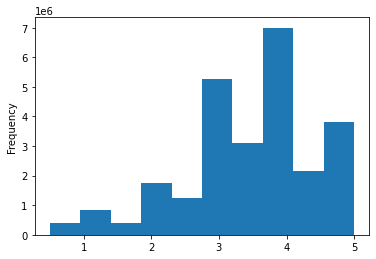

In [91]:
# ratings column - use statistics to do reasonability check on ratings
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()